In [1]:
!pip install tensorflow==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints

In [3]:
mp_holistic = mp.solutions.holistic # holistic model
mp_drawing = mp.solutions.drawing_utils # drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # color conversion
    image.flags.writeable = False                  # image not writeable
    results = model.process(image)                 # make prediction
    image.flags.writeable = True                   # image is writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # color conversion
    
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connection
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
                             )
    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
                             )
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=2, circle_radius=2)
                             )
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                             )

In [7]:
cap = cv2.VideoCapture(0)

# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# 3. Extract Keypoint Values

In [42]:
results.pose_landmarks.landmark[0].x

0.6360419988632202

In [45]:
len(results.pose_landmarks.landmark)

33

In [8]:
pose = []

for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [9]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [10]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [76]:
extract_keypoints(results).shape

array([ 0.74127251,  0.53438669, -1.70526433, ...,  0.52370441,
        0.50727469, -0.25451848])

In [79]:
result_test = extract_keypoints(results)

In [81]:
result_test

array([ 0.74127251,  0.53438669, -1.70526433, ...,  0.52370441,
        0.50727469, -0.25451848])

In [82]:
np.save('0', result_test)

In [83]:
np.load('0.npy')

array([ 0.74127251,  0.53438669, -1.70526433, ...,  0.52370441,
        0.50727469, -0.25451848])

# 4. Setup Folders for Collection

In [77]:
# path for exported data
DATA_PATH = os.path.join('MP_Data')

# actions to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# thirty videos of data
no_sequences = 30

# videos of 30 frames of length
sequence_length = 30

In [122]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training/Testing

In [123]:
cap = cv2.VideoCapture(0)

# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # ADDED BLOCK
    #loop through actions
    for action in actions:
        #Loop videos
        for sequence in range(no_sequences):
            # loop video length, sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                
                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # ADDED BLOCK
                # apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'Starting Collection', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(1000)
                else:
                    cv2.putText(image, 'Collecting Frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                
                # ADDED BLOCK
                # export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # show to screen
                cv2.imshow('OpenCV Feed', image)
        
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels

In [86]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [124]:
label_map = {label:num for num, label in enumerate(actions)}

In [125]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [126]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [91]:
np.array(sequences).shape

(90, 30, 1662)

In [92]:
np.array(labels).shape

(90,)

In [127]:
X = np.array(sequences)
X.shape

(90, 30, 1662)

In [128]:
y = to_categorical(labels).astype(int)

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# 7. Build and Train LSTM Model

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [130]:
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [141]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [103]:
res = [.7, .2, .1]

In [104]:
actions[np.argmax(res)]

'hello'

In [142]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [133]:
model.fit(X_train, y_train, epochs=150, callbacks=[tb_callback])

Epoch 1/150
3/3 [==============================] - 3s 330ms/step - loss: 2.1181 - categorical_accuracy: 0.3210
Epoch 2/150
3/3 [==============================] - 0s 58ms/step - loss: 9.6950 - categorical_accuracy: 0.2915
Epoch 3/150
3/3 [==============================] - 0s 59ms/step - loss: 2.9331 - categorical_accuracy: 0.3347
Epoch 4/150
3/3 [==============================] - 0s 58ms/step - loss: 3.9310 - categorical_accuracy: 0.4032
Epoch 5/150
3/3 [==============================] - 0s 59ms/step - loss: 2.6976 - categorical_accuracy: 0.3150
Epoch 6/150
3/3 [==============================] - 0s 60ms/step - loss: 1.1988 - categorical_accuracy: 0.4246
Epoch 7/150
3/3 [==============================] - 0s 57ms/step - loss: 4.2453 - categorical_accuracy: 0.4774
Epoch 8/150
3/3 [==============================] - 0s 56ms/step - loss: 16.7667 - categorical_accuracy: 0.4422
Epoch 9/150
3/3 [==============================] - 0s 58ms/step - loss: 3.4380 - categorical_accuracy: 0.3757
Epoch 10

In [107]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [134]:
res = model.predict(X_test)

In [137]:
actions[np.argmax(res[0])]

'iloveyou'

In [138]:
actions[np.argmax(y_test[0])]

'iloveyou'

# 9. Save Weights

In [139]:
model.save('action.h5')

In [140]:
del model

In [143]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [146]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [160]:
y_pred = model.predict(X_train)

In [161]:
y_true = np.argmax(y_train, axis=1).tolist()
y_pred = np.argmax(y_pred, axis=1).tolist()

In [162]:
multilabel_confusion_matrix(y_true, y_pred)

array([[[49,  7],
        [22,  7]],

       [[56,  1],
        [ 2, 26]],

       [[33, 24],
        [ 8, 20]]], dtype=int64)

In [163]:
accuracy_score(y_true, y_pred)

0.6235294117647059

# 11. Test in Real Time

In [175]:
colors = [(245, 117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
    return output_frame

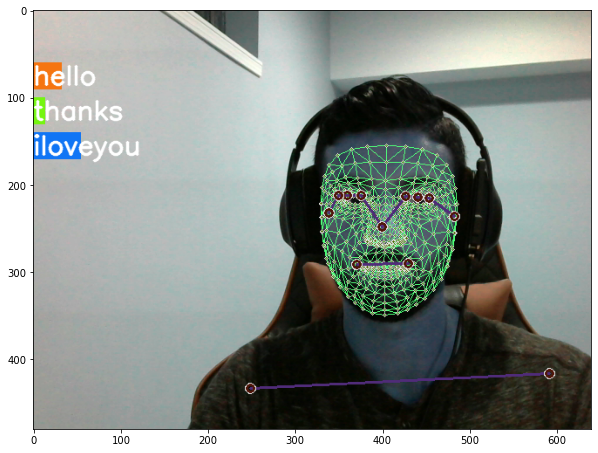

In [177]:
plt.figure(figsize=(10,10))
plt.imshow(prob_viz(res, actions, image, colors))

In [179]:
# 1. new detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)

# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. prediction logic
        keypoints = extract_keypoints(results)
        #sequence.insert(0, keypoints)
        #sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        # 3. Viz logic
            if np.unique(predictions[-10:])[0] == np.argmax(res): 
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
                    
        if len(sentence) > 5:
            sentence = sentence[-5:]
            
        # Viz probabilities
        image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        
        # show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [165]:
np.expand_dims(X_test[0], axis=0)

array([[[ 0.65803349,  0.47310129, -1.40726483, ...,  0.01801081,
          0.3599053 , -0.0568543 ],
        [ 0.65828711,  0.47311771, -1.52073216, ...,  0.02615401,
          0.35713843, -0.04653456],
        [ 0.65874964,  0.4731327 , -1.39854538, ...,  0.02538975,
          0.35660809, -0.04768177],
        ...,
        [ 0.63953525,  0.48119259, -1.35142863, ...,  0.06446528,
          0.35415867, -0.07154915],
        [ 0.64119339,  0.48053485, -1.33254933, ...,  0.05163731,
          0.34742814, -0.07012825],
        [ 0.64236844,  0.48006782, -1.35489404, ...,  0.04700903,
          0.34293675, -0.0501266 ]]])

In [164]:
model.predict(X_test)

array([[0.42897478, 0.09605438, 0.47497082],
       [0.42967603, 0.11275057, 0.45757338],
       [0.06461874, 0.870374  , 0.06500731],
       [0.42272598, 0.14658828, 0.43068567],
       [0.09487016, 0.7976231 , 0.10750674]], dtype=float32)